<center>
    <img src="https://www.clearlyrated.com/brand-logo/talent-path" width="500" alt="cognitiveclass.ai logo"  />
</center>

<h1 style="color:DarkBlue; text-align:center">Support Vector (Machine) Regression </h1>

<h2 style="color:DarkOrange;" id="custom-id"> Libraries Included</h2>
<ol style="color:DarkBlue;">
    <li>Pandas as pd</li>
    <li>Numpy as np</li>
    <li>Matplotlib.pyplot as plt</li>
    <li>Sklearn (multiple classes)</li>
</ol>
<i> Please make Make sure that you are looking at the Library List before each lesson starts<i>

<h1> Importing the Libraries </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h1>Importing the Dataset</h1>

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)
print('-----------------------------------')
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
-----------------------------------
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


<h2>Array Dimensions</h2>

<center>
    <img src="https://pediaa.com/wp-content/uploads/2019/01/Difference-Between-1D-and-2D-Array-Comparison-Summary.jpg" width="450" alt="cognitiveclass.ai logo"  />
</center>

In [4]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

<h1>Feature Scaling</h1>

In [5]:
# X we have 1 -> 10 but y is going from 4500 -> 10000000
# We don't want a standard scaler to be fitted into x and then to y, we need two different
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

print(X)
print()
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


<h1>Training our SVM</h1>

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,np.ravel(y))

SVR()

<center>
    <img src="https://data-flair.training/blogs/wp-content/uploads/sites/2/2017/08/svm-kernel-functions-2.jpg" alt="cognitiveclass.ai logo"  />
</center>

<center>
    <img src="https://i.stack.imgur.com/rZyn7.png" width="350"  alt="cognitiveclass.ai logo"/>
</center>

<h1>Predict</h1>
<p>We need to keep in mind the original scale of our data set! Thus we will introduce inverse transform. If you would like to read up more on this method please look at Sklearn's documentation on StandardScaler.</p>

In [8]:
# At 6.5 years of experience, does the model return around 160000?
# Get it to predict it in scale and represent the item we are looking for at the scale we are used to.
#regressor.predict([[6.5]]) # This is to scale (6.5 deviations above the mean)
#regressor.predict(sc_x.transform([[6.5]]))
# We need to expand the scale
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

<h1>Visualize</h1>

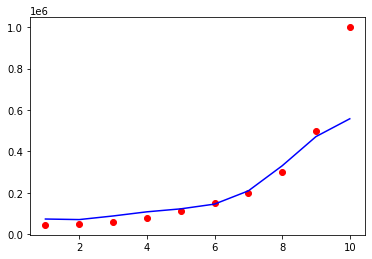

In [12]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.show()

<h1>Higher Definition Vizzes</h1>

In [ ]:
# Its not as flexable as a polynomial. Its not influeced by outlier data
